# Семинар по теории оптимальной транспортировки


На данном семинаре мы последовательно разберем хронологию вывода основных уравнений теории оптимальной транспортировки, рассмотрим приложение данной теории для ряда задач, и проведем обзор современного применения оптимальной траспортировки для задач машинного обучения с использованием нейронных сетей.

# Структура семинара 
## Теория
1.   Введение в оптимальную транспортировку. Постановка задачи Гаспаром Монжем (Earth Moving Distance)
2.   Проблема вычисления Earth Moving Distance. 
3.   Постановка проблемы Леонидом Канторовичем

## Практика 

1.   Использование теории оптимальной транспортировки для задачи траспортировки продуктов между пекарнями и кафе
2.   Использование теории оптимальной транспортировки для задачи транспортировки/трансфера цвета между изображениями

## Дистанция Вассерштейна и Генеративные сети
1.   Дуальная постановка Канторовича
2.   Дистанция Вассерштейна 
3.   Вассерштейн Генеративно-Состязательные Сети






---

# Введение в теорию оптимальной транспортировки


## Постановка задачи Гаспаром Монжем (Earth Moving Distance)

Задача оптимальной транспортировки в математике называется задачей Монжа-Канторовича.

Формальное описание, данное Монжем:

\\

$\displaystyle \inf_{T_{\#} \mu \ =\upsilon } \ \int _{\Omega} \ c( x,\ T( x)) \ \mu ( dx)$  

\\

Где: 

* $\Omega - \ измеримое \ пространство $
* $с:\Omega\times \Omega\ \rightarrow \mathbb{R},$ 
* $\mu ,\nu \ вероятностные\ меры\ в\ пространстве\ \mathbb{P}( \Omega)$
* $\displaystyle T\ :\ \Omega \ \rightarrow \ \Omega $

Задача заключается в минимизации этой работы поиском оптимального $\displaystyle T$
 

В данной постановке задачи это свойство мало применимо на практике в том числе в машинном обучении, так как в постановке Монжа массы не делимы. 

## Постановка проблемы Леонидом Канторовичем
Леонид Канторович изучил данную проблему в 20 веке, переформулировал и упростил ее, чем и положил начало новых исследований в данной области. 


Постановка Канторовича осуществляет некоторую relaxation допуская возможность разделения масс для сохранения пропорции. 


Канторович поставил задачу, вместо поиска transport map искать transport plan

\\
$$
\inf\iint c( x,y) \ P( dx,\ dy) ,\ \ P\in \prod ( \mu ,\ u)
$$


$\ P( X,Y) \ =\ \mu ( x) \ \times \ \nu ( Y)$

\\


Задача найти такую меру $\displaystyle P\ $ заданную на $\displaystyle X,\ Y$ что:

$\displaystyle  \begin{array}{{>{\displaystyle}l}}
\int _{\ x\ in\ X} P( dx,dy) =\nu ( y) \ -\ вся\ масса\ траспортированная\ из\ x\ \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ суммируется\ в\ значение\ распределения\ \nu ( y) \ в\ этой\ точке\\
\\
\int\nolimits _{\ y\ in\ Y} P( dx,dy) =\mu ( x) \ -\ вся\ масса\ траспортированная\ из\ y\ \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ суммируется\ в\ значение\ распределения\ \mu ( x) \ в\ этой\ точке
\end{array}$



При этом минимизирующую $\displaystyle \iint c( x,y) \ P( dx,\ dy)$



---



# Практика


Теория оптимальной транспортировки позволяет сравнивать два (взвешенных) облака точек $(X, a)$ и $(Y, b)$, где $X \in \mathbb{R}^{n \times d}$ и $Y \in \mathbb{R}^{m \times d}$ - расположение в $n$ (соответственно и в $m$) точек размерностью $d$, и где $a \in \mathbb{R}^n$, $b \in \mathbb{R}^m$ есть веса.

\\

Необходимым является условие, чтобы сумма весов была равна единице, то есть $\sum_{i=1}^n a_i = \sum_{j=1}^m b_j = 1$.
Базовая идея оптимальной траспортировки заключается в том, чтобы "траспортировать" массу расположенную в точках $X$ в массу расположенную в точках $Y$.

\\

Давайте обозначим через $\mathcal{U}(a,b) = \left\{ P \in \mathbb{R}^{n \times m} \,|\, P \geq 0, \sum_{j=1}^m P_{ij} = a_i, \sum_{i=1}^n P_{ij} = b_j\right\}$ множество возможных траспортных планов.
Если $P \in \mathcal{U}(a,b)$, количество $P_{ij} \geq 0$ должно рассматриваться как масса, траспортированная из точки $X_i$ в точку $Y_j$. Поэтому мы и называем эту величину планом траспортировки.

\\

Мы также будем рассматривать матрицу стоимости $C \in \mathbb{R}^{n \times m}$. Значение $C_{ij}$ может быть рассмотрено как цена, которую необходимо заплатить, чтобы траспортировать одну точку массы из $X_i$ в $Y_j$. Эта цена обычно определяется позицией $X_i$ и $Y_j$, например $C_{ij} = \|X_i - Y_j\|$ or $C_{ij} = \|X_i - Y_j\|^2$.

\\


Тогда транспортируемая по плану $P \in \mathcal{U}(a,b)$ масса имеет общую стоимость, равную $\sum_{ij} P_{ij} C_{ij}$.
В теории оптимальной транспортировки мы хотим найти такой план, который минимизирует общую стоимость. Другими словами, мы хотим решить 
$$
    \min_{P \in \mathcal{U}(a,b)} \sum_{ij} C_{ij }P_{ij}.
$$

Данная прблема является задачей линейного программирования: целевая функция линейна по $P$, и ограничения оптимизации тоже линейны для $P$. Мы можем решить данную проблему, используя классические алгоритмы линейного программирования, например симплекс-методом.

Если $P^*$ - это решение проблемы оптимальной транспортировки, мы скажем, что $P^*$ - оптимальный транспорт между $(X, a)$ и $(Y, b)$, и что $\sum_{ij} P^*_{ij} C_{ij}$ - это дистанция оптимальной траспортировки $(X, a)$ и $(Y, b)$ или, другими словами, минимальное значение энергии/работы, которое необходимо затратить, чтобы траспортировать массу, расположенную в точках $X$ в целевое значение масс, расположенных в точках $Y$.

# Использование теории оптимальной транспортировки для задачи траспортировки продуктов между пекарнями и кафе

В данной задаче мы имеем позиции пекарен $X \in \mathbb{R}^{8 \times 2}$ и соответсвующие им продукты $a \in \mathbb{R}^8$ которые описываются облаком точек. Кафе, в котором продается выпечка из пекарен, обозначены расположением $Y \in \mathbb{R}^{5 \times 2}$ и $b \in \mathbb{R}^{5}$.

In [ ]:
!pip install POT

import ot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 682 kB 15.0 MB/s 


In [ ]:
import os
!pip install --upgrade git+https://github.com/mlss-skoltech/tutorials.git#subdirectory=optimal_transport_tutorial

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mlss-skoltech/tutorials.git to /tmp/pip-req-build-6fciwan8
  Running command git clone -q https://github.com/mlss-skoltech/tutorials.git /tmp/pip-req-build-6fciwan8
  Created wheel for optimaltransport: filename=optimaltransport-0.1-py3-none-any.whl size=7865019 sha256=c732924075d20c1c8414674081591a7dbf7dd173753fcdd7490d4c6f52243cd1
  Stored in directory: /tmp/pip-ephem-wheel-cache-2xiv_p8g/wheels/9e/fb/2b/536aff4a1fc34853a50259e62fe1656cefda88d3419d2b6eac
Successfully built optimaltransport


In [ ]:
import pkg_resources

DATA_PATH = pkg_resources.resource_filename('optimaltransport', 'data/')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the data
import pickle

with open(DATA_PATH + 'croissants.pickle', 'rb') as file:
    croissants = pickle.load(file)

X = croissants['bakery_pos']
a = croissants['bakery_prod']
Y = croissants['cafe_pos']
b = croissants['cafe_prod']

print('Bakery productions =', a)
print('Café sales =', b)
print('Total number of croissants =', a.sum())

Bakery productions = [31. 48. 82. 30. 40. 48. 89. 73.]
Café sales = [82. 88. 92. 88. 91.]
Total number of croissants = 441.0


In [ ]:
X

array([[184.86464733, 201.8163543 ],
       [449.3486663 , 168.40784664],
       [245.41756746, 288.12166576],
       [273.95400109, 364.68282915],
       [494.58935376, 336.8424061 ],
       [738.19305545, 238.70491485],
       [736.10502372, 375.12298779],
       [537.74200949, 482.30861653]])

In [ ]:
Y

array([[302.08410452, 442.78633642],
       [345.1162221 , 368.52123027],
       [449.226184  , 201.94529124],
       [454.08464888, 387.95508982],
       [627.60125204, 408.7770822 ]])

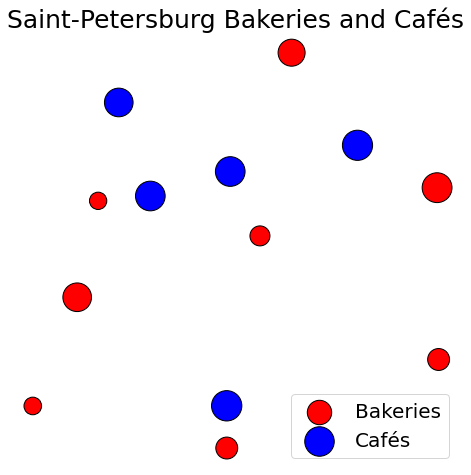

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], s=10*a, c='r', edgecolors='k', label='Bakeries')
plt.scatter(Y[:,0], Y[:,1], s=10*b, c='b', edgecolors='k', label='Cafés')
plt.legend(fontsize=20)
plt.axis('off')
plt.title('Saint-Petersburg Bakeries and Cafés', fontsize=25)
plt.show()

Вычислим матрицу стоимости, где стоимость определяется расстоянием, вычислим такую матрицу используя расстояния $\ell_1$ и $\ell_2$.


In [ ]:
C_1 = np.zeros((8,5))
C_2 = np.zeros((8,5))
for i in range(8):
    for j in range(5):
        C_1[i,j] = np.linalg.norm(X[i]-Y[j])
        C_2[i,j] = C_1[i,j]**2

In [ ]:
C_2

array([[ 71806.93342368,  53471.0828867 ,  69887.03869363,
        107127.03809694, 238848.44404326],
       [ 96970.40680838,  50909.76872922,   1124.77519163,
         48223.42151718,  89551.35372338],
       [ 27132.25677185,  16403.91170975,  48964.31969921,
         53508.66342873, 160622.09827457],
       [  6891.46056701,   5078.79502259,  57203.84434635,
         32988.64839201, 127010.6812586 ],
       [ 48282.38735754,  23345.76498866,  20255.04876894,
          4253.1375545 ,  22866.76271036],
       [231840.24371169, 171361.67266306,  84853.12272464,
        102993.20141004,  41155.08908898],
       [192952.48705117, 152915.82619273, 112289.98326498,
         79700.15466443,  12905.66653869],
       [ 57096.65880001,  50052.26323952,  86438.64553436,
         15901.14198628,  13481.57001385]])

Теперь вычислим с помощью библиотеки ОТ оптимальную траспортировку выпечки из перкарен в кафе, для двух матриц расстояния по $\ell_1$ и $\ell_2$

In [ ]:
optimal_plan_1 = ot.emd(a, b, C_1)
print(optimal_plan_1)
optimal_cost_1 = np.sum(optimal_plan_1*C_1)
print('1-Wasserstein distance =', optimal_cost_1)
print('')

optimal_plan_2 = ot.emd(a, b, C_2)
print(optimal_plan_2)
optimal_cost_2 = np.sum(optimal_plan_2*C_2)
print('2-Wasserstein distance =', np.sqrt(optimal_cost_2))

[[ 0. 31.  0.  0.  0.]
 [ 0.  0. 48.  0.  0.]
 [25. 57.  0.  0.  0.]
 [30.  0.  0.  0.  0.]
 [ 0.  0.  0. 40.  0.]
 [ 0.  0. 44.  2.  2.]
 [ 0.  0.  0.  0. 89.]
 [27.  0.  0. 46.  0.]]
1-Wasserstein distance = 61523.15971278249

[[ 0. 31.  0.  0.  0.]
 [ 0.  0. 48.  0.  0.]
 [52. 30.  0.  0.  0.]
 [30.  0.  0.  0.  0.]
 [ 0. 27.  0. 13.  0.]
 [ 0.  0. 44.  2.  2.]
 [ 0.  0.  0.  0. 89.]
 [ 0.  0.  0. 73.  0.]]
2-Wasserstein distance = 3292.139032582319


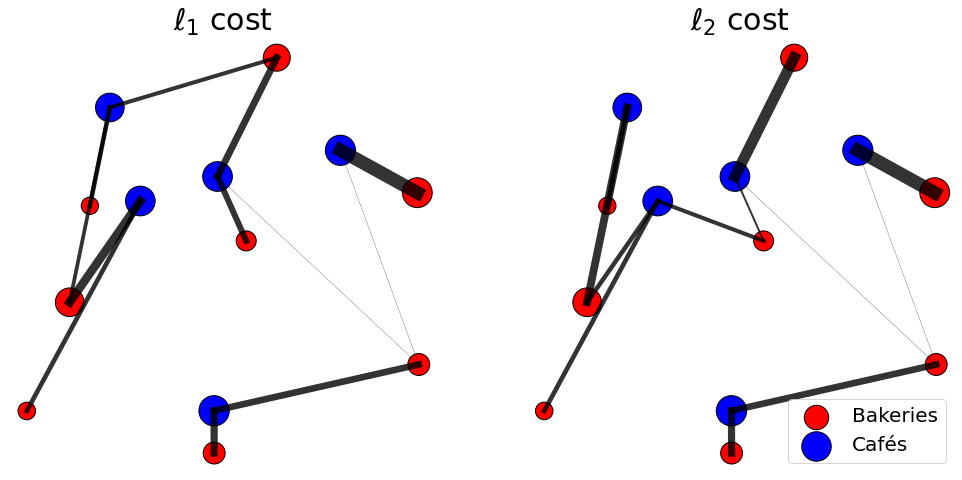

In [ ]:
fig = plt.figure(figsize=(17,8))

ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], s=10*a, c='r', edgecolors='k', label='Bakeries')
ax.scatter(Y[:,0], Y[:,1], s=10*b, c='b', edgecolors='k', label='Cafés')
for i in range(8):
    for j in range(5):
        ax.plot([X[i,0], Y[j,0]], [X[i,1], Y[j,1]], c='k', lw=0.15*optimal_plan_1[i,j], alpha=0.8)
ax.axis('off')
ax.set_title('$\ell_1$ cost', fontsize=30)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X[:,0], X[:,1], s=10*a, c='r', edgecolors='k', label='Bakeries')
ax.scatter(Y[:,0], Y[:,1], s=10*b, c='b', edgecolors='k', label='Cafés')
for i in range(8):
    for j in range(5):
        ax.plot([X[i,0], Y[j,0]], [X[i,1], Y[j,1]], c='k', lw=0.15*optimal_plan_2[i,j], alpha=0.8)
ax.axis('off')
ax.set_title('$\ell_2$ cost', fontsize=30)

plt.legend(fontsize=20)
plt.show()

## Использование теории оптимальной транспортировки для задачи транспортировки/трансфера цвета между изображениями

Для исходного и целевого изображений цель передачи цвета состоит в том, чтобы преобразовать цвета исходного изображения так, чтобы оно было похоже на цветовую палитру целевого изображения. В конце концов, мы хотим найти «цветовое отображение», дающее каждому цвету исходного изображения новый цвет. Это можно сделать, вычислив оптимальный транспортный план между двумя изображениями, которые видны как облака точек в пространстве RGB.

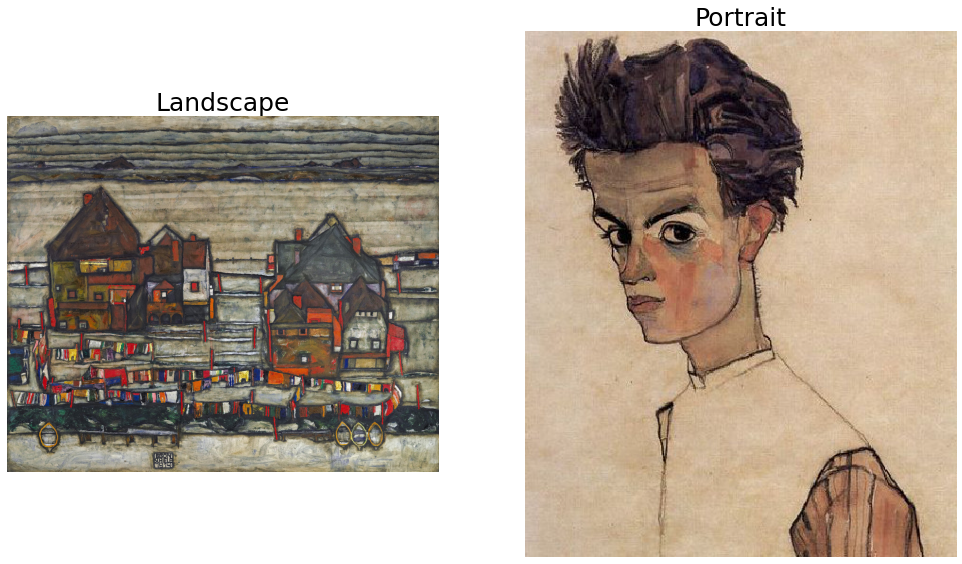

In [ ]:
import numpy as np
import ot
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from mpl_toolkits.mplot3d import Axes3D

I1 = imread(DATA_PATH + 'schiele.jpg').astype(np.float64) / 256
I2 = imread(DATA_PATH + 'schiele2.jpg').astype(np.float64) / 256

fig = plt.figure(figsize=(17, 30))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(I1)
ax.set_title('Landscape', fontsize=25)
ax.axis('off')

ax = fig.add_subplot(1, 2, 2)
ax.imshow(I2)
ax.set_title('Portrait', fontsize=25)
ax.axis('off')

plt.show()

Нам нужно будет работать с «матрицами» вместо изображений. Поскольку существует 3 цвета, изображения имеют форму (Ширина, Высота, 3), а соответствующие матрицы будут иметь форму (Ширина * Высота, 3).

In [ ]:
def im2mat(I):
    '''Convert image I to matrix.'''
    return I.reshape(-1,3)

def mat2im(X, shape):
    '''Convert matrix X to image with shape 'shape'.'''
    return X.reshape(shape)

X1 = im2mat(I1)
X2 = im2mat(I2)

В реальных изображениях слишком много разных цветов, поэтому нам потребуется их подвыборка. Для этого мы используем K-средние для всех цветов и оставляем только вычисленные центроиды. Обратите внимание, что использование мини-пакетных K-средних ускоряет вычисления.

In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Size of the subsampled point clouds
nbsamples = 1000

kmeans1 = MiniBatchKMeans(n_clusters=nbsamples, init_size=nbsamples).fit(X1)
X1_sampled = kmeans1.cluster_centers_

kmeans2 = MiniBatchKMeans(n_clusters=nbsamples, init_size=nbsamples).fit(X2)
X2_sampled = kmeans2.cluster_centers_

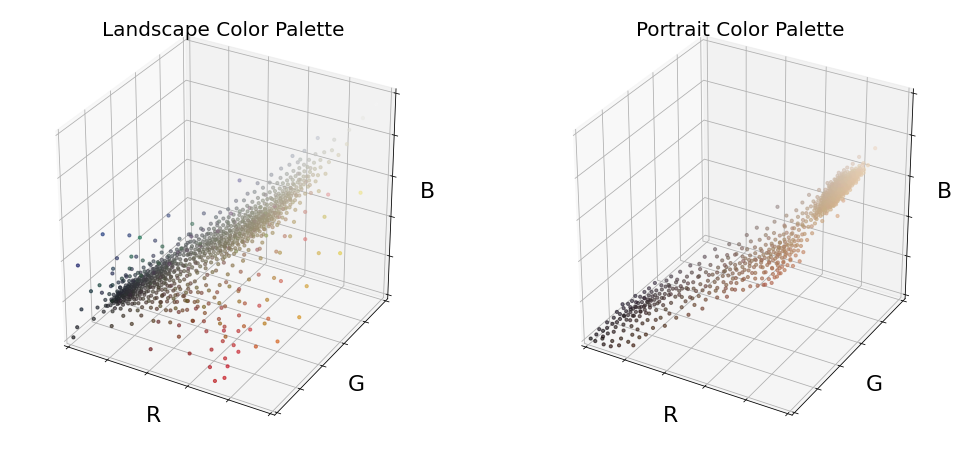

In [ ]:
def showImageAsPointCloud(X, Y):
    '''Show the color palette associated with images X and Y.'''
    fig = plt.figure(figsize=(17,8))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_xlim(0,1)
    ax.scatter(X[:,0], X[:,1], X[:,2], c=X, s=10, marker='o', alpha=0.6)
    ax.set_xlabel('R',fontsize=22)
    ax.set_xticklabels([])
    ax.set_ylim(0,1)
    ax.set_ylabel('G',fontsize=22)
    ax.set_yticklabels([])
    ax.set_zlim(0,1)
    ax.set_zlabel('B',fontsize=22)
    ax.set_zticklabels([])
    ax.set_title('Landscape Color Palette', fontsize=20)
    ax.grid('off')
    
    ax = fig.add_subplot(122, projection='3d')
    ax.set_xlim(0,1)
    ax.scatter(Y[:,0], Y[:,1], Y[:,2], c=Y, s=10, marker='o', alpha=0.6)
    ax.set_xlabel('R',fontsize=22)
    ax.set_xticklabels([])
    ax.set_ylim(0,1)
    ax.set_ylabel('G',fontsize=22)
    ax.set_yticklabels([])
    ax.set_zlim(0,1)
    ax.set_zlabel('B',fontsize=22)
    ax.set_zticklabels([])
    ax.set_title('Portrait Color Palette', fontsize=20)
    ax.grid('off')
    
    plt.show()
showImageAsPointCloud(X1_sampled, X2_sampled)

Для того, чтобы вычислить оптимальную траспортировку между двумя облаками точек, как и в предыдущей задаче, мы сперва должны задать некоторую дистанцию и в данной задаче мы будем использовать квадратичную дистанцию $C_{ij} = \|X_i - Y_j\|^2$.

In [ ]:
C_1 = np.ones((nbsamples,nbsamples))
C_2 = np.ones((nbsamples,nbsamples))
for i in range(nbsamples):
    for j in range(nbsamples):
        C_1[i,j] = np.linalg.norm(X1_sampled[i]-X2_sampled[j])
        C_2[i,j] = C_1[i,j]**2

In [ ]:
OT_plan = ot.emd(np.ones(nbsamples), np.ones(nbsamples), C_2)

In [ ]:
def colorTransfer(OT_plan, kmeans1, kmeans2, shape):
    '''Return the color-transfered image of shape "shape".'''
    samples_transformed = OT_plan.dot(kmeans2.cluster_centers_)
    X1_transformed = samples_transformed[kmeans1.labels_]
    return mat2im(X1_transformed, shape)

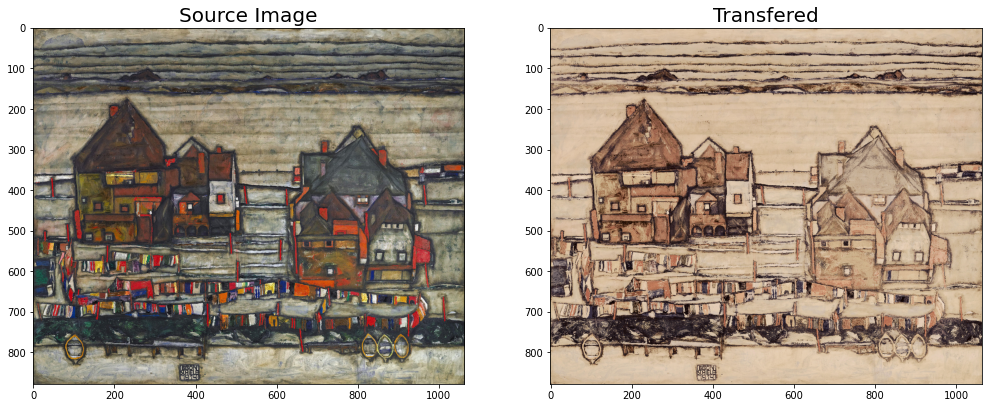

In [ ]:
fig = plt.figure(figsize=(17, 20))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(I1)
ax.set_title('Source Image', fontsize=20)

ax = fig.add_subplot(1, 2, 2)
I = colorTransfer(OT_plan, kmeans1, kmeans2, I1.shape)
ax.imshow(I)
ax.set_title('Transfered', fontsize=20)

plt.show()

--- 

 ## Дистанция Вассерштейна и Генеративно-Состязательные Сети 

## Двойственная постановка Канторовича


\\

$$Primal:\inf_{P\in \prod ( \mu ,\nu )}\iint c( x,y) \ P( dx,\ dy)$$ 

\\

$$Dual:\displaystyle \sup _{ \begin{array}{{>{\displaystyle}l}}
\phi \in L_{1}( \mu ) ,\ \psi \ \in L_{1}( \nu )\\
\phi ( x) \ +\psi ( y) \ \leqslant c( x,y)
\end{array}}\int \phi d\mu +\int \psi d\nu \ $$  

\\
Логически возникающий вопрос: откуда двойственная постановка собственно возникает, и что означают переменные там возникающие?

Глобально, идея данного подхода заключается в перестановке ограничений и переменных местами, при этом задача минимизации меняется на задачу максимизации.

Осуществим вывод двойственной постановки:

\\

$$ 
L_{\prod }( P) \ =\ \sup _{\phi ,\psi }\left[\int \phi d\mu +\int \psi d\nu -\iint \phi \ \oplus \ \psi dP\right] \ =\{0\ if\ P\in \prod ( \mu ,\nu ) \ \ or\ +\infty \ otherwise\ \\
$$

\\
Данное выражение выглядит достаточно сложно. Глобально это выражение есть представление задачи оптимизации в такой форме, чтобы оптимизируя ее, мы смогли найти правильную функцию P, то есть правильный coupling. 

Это выражение утверждает, что функция от $\displaystyle P\ $(coupling) равна нулю, если мы имеем правильные маргинальные распределения, и плюс бесконечность в любом другом случае. 


В данном выражении мы берем supremum от 

$$\displaystyle \int \phi d\mu +\int \psi d\nu $$

\\

Отнимаем от этих функций

$$\displaystyle \iint \phi \ \oplus \ \psi dP$$ 
Где это выражение есть ничто иное как: 

\\
$$\displaystyle \iint \phi \ ( x) \ dP(x ,y) \ +\ \iint \psi ( y) dP( x,y)$$
\\

Как результат, если функция P задает правильные маргиналы, то, так как 

\\
$$\displaystyle \int \phi d\mu \ =\iint \phi ( x) dP(x ,y) \ \ и\ \int \psi d\nu \ =\ \iint \psi ( y) dP( x,y) $$ 

\\
Наше выражение будет равно нулю. Если coupling неверный, значит, где-то мы будем иметь ненулевое значение, и следовательно, мы всегда можем максимизировать функции $\displaystyle \phi ,\ \psi $ в плюс бесконечность. 



Далее проделываем трюк перехода в двойственную задачу. 

Запишем функцию, которую необходимо оптимизировать:

\\

$$\displaystyle \inf_{P\in \prod ( \mu ,\nu )}\iint cdP$$ и у нас есть некоторое условие, которое мы можем превратить в часть объектной функции 
$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\iint cdP+\ L_{\prod }( P)$$

\\

Запишем задачу в более детальной форме.

\\

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\iint cdP+\sup _{\phi ,\psi }\int \phi d\mu +\int \psi d\nu -\iint \phi \ \oplus \ \psi dP\ $$

\\

Далее начинается алгебраическая игра по упрощению выражения. Осуществим перемещение мест $\displaystyle \inf ,\sup $. Доказательство возможности такой перестановки выходит за рамки данного курса.  

\\

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\sup _{\phi ,\psi }\iint cdP+\int \phi d\mu +\int \psi d\nu -\iint \phi \ \oplus \ \psi dP$$

\\

Перенесем все члены (terms) с $\displaystyle P$ влево

\\

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\sup _{\phi ,\psi }\iint cdP-\iint \phi \ \oplus \ \psi dP+\int \phi d\mu +\int \psi d\nu $$
\\
 

В таком случае более явно видно, что мы имеем два двойных интеграла по $\displaystyle P$. Их можно объеденить. 

\\

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\sup _{\phi ,\psi }\iint ( c-\phi \ \oplus \ \psi ) dP+\int \phi d\mu +\int \psi d\nu $$

\\

И снова инверсия $\displaystyle \sup -\inf \ $

$$\displaystyle \sup _{\phi ,\psi } \ \inf_{P\in P_{+}\left( \Omega^{2}\right)}\iint ( c-\phi \ \oplus \ \psi ) dP+\int \phi d\mu +\int \psi d\nu $$

\\

В таком случае, в выражении, в первую очередь происходит интегрирование по $\displaystyle P$ и только потом по $\displaystyle \psi ,\phi $. 

\\

Вопрос, насколько низкие значения может принимать первая часть выражения? 

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\left[\iint ( c-\phi \ \oplus \ \psi ) dP\right] =\ \inf_{P\in P_{+}\left( \Omega^{2}\right)}\left[ с( x,y) -\iint \phi ( x) dP(x ,y) \ +\iint \psi ( y) dP( x,y)\right] \ $$  

 

$$\displaystyle \inf_{P\in P_{+}\left( \Omega^{2}\right)}\iint ( c-\phi \ \oplus \ \psi ) dP\ =\ 0\ if\ \ c-\phi \ \oplus \ \psi \ \geqslant \ 0\ \ and\ -\infty \ otherwise$$


То есть если $\displaystyle c-\phi \ \oplus \ \psi $ ⩽ 0, то так как мы берем infimum, наши значения функций будут принимать значения, уходящие в минус бесконечность. Но если у нас $\displaystyle c-\phi \ \oplus \ \psi $ ⩾ 0,  то, так как мы берем infimum, самый минимум, который мы можем получить это 0. Так как мы не максимизируем, риска, что выражение начнет принимать значение плюс бесконечность у нас нет. Поэтому имеем два условия, и затем просто транслируем это свойство, как необходимое условие для того, чтобы мы имели решение двойственной постановки. 

$$\displaystyle \sup _{\phi \ \oplus \ \psi \ \leqslant c}\int \phi d\mu +\int \psi d\nu $$ - Dual


## Дистанция Вассерштейна

Дистанция Вассерштейна есть ничто иное, как задача Кантаровича, на которой задана некоторая метрика. В зависимости от метрики у нас будут выстраиваться определенные свойства.

Дистанция Вассерштейна определяется в любой размерности и имеет следующий общий вид: 
$$W_{p}^{p}(\mu ,\nu)=\inf _{P} \int P(x, y)\|x-y\|_{k}^{k} d x d y$$

Дистанция Вассерштейна в двойственной постановке.



$$\displaystyle W^{p}_{p}( \mu ,\nu ) \ =\ \sup _{ \begin{array}{{>{\displaystyle}l}}
\phi \ ( x) \in L_{1}( \mu ) ,\ \psi ( y) \ \in L_{1}( \nu )\\
\phi ( x) \ \oplus \ \psi ( y) \ \leqslant D^{p}( x,y)
\end{array}}\int \phi d\mu +\int \psi d\nu $$

При двойственной постановке возникает вопрос о возможности еще сократить размерность параметров, которые нам необхомдимо оптимизировать. Несмотря на то, что мы сократили размер параметров, некоторая сложность c размерностью $\displaystyle \Omega$ все же сохраняется. 



Чтобы сократить размерность была применена достаточно интересная теория, под названием D - transforms, которая уходит корнями к выпуклой оптимизации. 



Идея ее в следующем: 

Представим, что мы нашли некоторую функцию $\displaystyle \phi $. Как мы можем найти $\displaystyle \psi $?

Имея заданное нами ограничение $\displaystyle \phi \ \oplus \ \psi \ \leqslant D( x,y)$ мы можем легко вывести $\displaystyle \psi $ при имеющемся $\displaystyle \phi $.



$\displaystyle  \begin{array}{{>{\displaystyle}l}}
\psi ( y) \ \leqslant D^{p}( x,y) -\ \phi ( x) \ \\
\\
\psi ( y) \ \leqslant \inf_{x} D^{p}( x,y) -\ \phi ( x) \ 
\end{array}$



Определяя в этом уравнении infimum мы собственно и определяем функцию $\displaystyle \psi $



$\displaystyle \phi ^{'}( y) \ \leqslant \inf_{x} D^{p}( x,y) -\ \phi ( x)$

$\displaystyle W^{p}_{p}( \mu ,\nu ) \ =\ \sup _{\phi \ }\int \phi d\mu +\int \phi 'd\nu $


$\displaystyle W^{p}_{p}( \mu ,\nu ) \ =\ \sup _{\phi \ is\ D^{p} \ concave}\int \phi d\mu +\int \phi 'd\nu $ - Semi Dual 



Важным замечанием является то, что: $\displaystyle D^{p} \ concave\ equal\ to\ L_{1} \ Lipshetz\ $

То есть, если функции Липшецевы, тогда дистанция является дистанцией Вассерштейна. Доказательство этого выходит за рамки данного семинара.




В случае если $\displaystyle D^{1}$, то есть p=1, тогда мы можем записать дистанцию Вассерштейна так:



$\displaystyle W^{1}_{p}( \mu ,\nu ) \ =\ \sup _{\phi \ is\ D^{p} \ concave}\int \phi ( d\mu -d\nu )$


Для удобства заменим обозначение функции через $f$


$$W_{c}[p, q]=\sup _{f \in L_{c}}\left[\int f(x) p(x) d x-\int f(y) q(y) d y\right]$$

И запишем условие этой оптимизации такое, что функция $f$ должна оставаться Липшецевой 

Давайте теперь подумаем еще раз, какую задачу решает функция $f$ в данной формулировке: Предположим что распределения, с которыми мы работаем, являются распределениями изображений людей $P$ и животных $Q$

Однако сама по себе формула имеет довольно интуитивное толкование. Очевидно, что если
p равно q, разница между их ожидаемыми значениями любой функции f будет равна нулю, и, следовательно, расхождение исчезнет. Теперь предположим, что p и q различаются в некоторой области своего домена. В этом случае расхождение получается путем нахождения функции f, которая максимизирует эту разницу в терминах ее ожидаемого значения. Другими словами, f действует как детектор признаков, максимально отличающих p от q. Например, представьте, что p - это распределение по изображениям ландшафта без следов человеческой деятельности, а q - распределение по изображениям ландшафта с самолетом в небе. В этом случае оптимальным f будет плоский детектор. Из этого примера вы можете увидеть, как f играет роль дискриминатора в Wasserstein GAN. Обратите внимание, что без каких-либо ограничений на f любую небольшую разницу в распределениях можно произвольно увеличить, и расхождение будет бесконечным.

Давайте теперь используем нейронные сети в качестве функции $f$

In [ ]:
import argparse
import os
import numpy as np
import math
import sys

In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torchvision.transforms as transforms
from torchvision.utils import save_image, make_grid

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

In [ ]:
mnist_dataset = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))
                   ]))
dataloader = torch.utils.data.DataLoader(mnist_dataset, batch_size=64, shuffle=True)

device = "cuda" if torch.cuda.is_available() else "cpu"

Label:  5


(array([55.,  4.,  3.,  0.,  3.,  2.,  1.,  0.,  1.,  3.,  1.,  3.,  2.,
         1., 21.]),
 array([-1.        , -0.86771244, -0.7354248 , -0.60313725, -0.47084966,
        -0.3385621 , -0.20627451, -0.07398693,  0.05830066,  0.19058824,
         0.32287583,  0.4551634 ,  0.587451  ,  0.71973854,  0.85202616,
         0.9843137 ], dtype=float32),
 <a list of 15 Patch objects>)

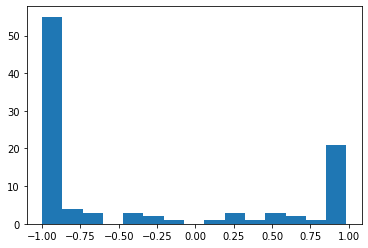

In [ ]:
img, label = mnist_dataset[0]
print("Label: ", label)
plt.hist(img[:, 5:15, 5:15].flatten(), bins=15)

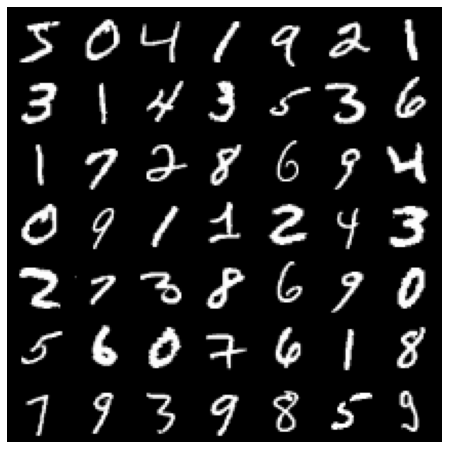

In [ ]:
# show image sample with matplotlib
to_show =[]
for i in range(49):
  to_show.append(mnist_dataset[i][0])

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(make_grid(torch.stack(to_show), nrow=7, normalize=True).permute(1, 2, 0), cmap='gray');

In [ ]:
img_shape = (1, 28, 28)
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(int(np.prod(28*28)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
        )

    def forward(self, img):
        img_flat = img.view(img.shape[0], -1)
        validity = self.model(img_flat)
        return validity


# Initialize generator and discriminator
discriminator = Discriminator()

# Optimizers
optimizer_D = torch.optim.RMSprop(discriminator.parameters(), lr=0.00005)

Но какие распределения мы будем использовать? Давайте попробуем вместо P использовать распределения, которые мы получаем некоторой функцией, преобразующей нормальное распределение некоторой размерности. 

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(100, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.shape[0], *img_shape)
        return img

generator = Generator()
optimizer_G = torch.optim.RMSprop(generator.parameters(), lr=0.00005)


Теперь попробуем обучить функцию генератора таким образом, чтобы то распределение, в которое он трансформирует нормальное было максимально близко к распределению изображений $P_{θ}=g_{\theta}(Z)$ to match $P_r$. 

Мы можем для фиксированного $g_{\theta}$ вычислить функцию $f_{w}$ так, чтобы она показывала точную дистанцию Вассерштейна между сгенерированными и реальными изображениями.
Затем мы можем использовать данное значение для обучения генератора с помощью backprop

$$\begin{aligned} \nabla_{\theta} W\left(P_{r}, P_{\theta}\right) &=\nabla_{\theta}\left(\mathbb{E}_{x \sim P_{r}}\left[f_{w}(x)\right]-\mathbb{E}_{z \sim Z}\left[f_{w}\left(g_{\theta}(z)\right)\right]\right) \\ &=-\mathbb{E}_{z \sim Z}\left[\nabla_{\theta} f_{w}\left(g_{\theta}(z)\right)\right] \end{aligned}$$ 

Алгоритм будет выглядеть так:

*   For a fixed $\theta$, compute an approximation of $W(P_r,P_\theta)$ by training fw to convergence.
* Once we find the optimal fw, compute the θ gradient $ -\mathbb{E}_{z \sim Z}\left[\nabla_{\theta} f_{w}\left(g_{\theta}(z)\right)\right]$ by sampling several $z$.
*   Update θ, and repeat the process.



In [ ]:
if not os.path.exists("./images"):
    os.makedirs("./images")

sample_vectors = torch.Tensor(np.random.normal(0, 1, (100, 100))).to(device)

def denorm(x):
    return (x + 1) / 2

def save_fake_images_mnist(G_model, index):
    fake_images = G_model(sample_vectors)
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    fake_fname = "fake_images-{0:0=4d}.png".format(index)
    print("Saving", fake_fname)
    save_image(denorm(fake_images), os.path.join("./images", fake_fname), nrow=10)

In [ ]:
Tensor = torch.FloatTensor
total_step = len(dataloader)
d_losses, g_losses, real_scores, fake_scores = [], [], [], []
for epoch in range(300):

    for i, (imgs, _) in enumerate(dataloader):

        # Configure input
        real_imgs = Variable(imgs).to(device)

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Sample noise as generator input
        z = Variable(Tensor(np.random.normal(0, 1, (imgs.shape[0], 100)))).to(device)

        # Generate a batch of images
        fake_imgs = generator(z).detach()

        # Adversarial loss
        fake_score = discriminator(fake_imgs)
        real_score = discriminator(real_imgs)
        loss_D = torch.mean(fake_score) - torch.mean(real_score)

        loss_D.backward()
        optimizer_D.step()

        # Clip weights of discriminator
        for p in discriminator.parameters():
            p.data.clamp_(-0.01, 0.01)

        # Train the generator every n_critic iterations
        if i % 5 == 0:

            # -----------------
            #  Train Generator
            # -----------------

            optimizer_G.zero_grad()

            # Generate a batch of images
            gen_imgs = generator(z)
            # Adversarial loss
            fake_score = discriminator(gen_imgs)
            loss_G = -torch.mean(fake_score)

            loss_G.backward()
            optimizer_G.step()

        if (i + 1) % 100 == 0 or (i + 1) == total_step:
            d_losses.append(loss_D.item())
            g_losses.append(loss_G.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print(
                "Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}".format(
                    epoch,
                    100,
                    i + 1,
                    total_step,
                    loss_D.item(),
                    loss_G.item(),
                    real_score.mean().item(),
                    fake_score.mean().item(),
                )
            )
    save_fake_images_mnist(generator, epoch + 1)

Epoch [0/100], Step [100/938], d_loss: -9.6064, g_loss: -2.9809, D(x): 13.09, D(G(z)): 3.49
Epoch [0/100], Step [200/938], d_loss: -7.6991, g_loss: -15.3606, D(x): 23.81, D(G(z)): 16.11
Epoch [0/100], Step [300/938], d_loss: -5.3325, g_loss: -20.4894, D(x): 25.68, D(G(z)): 20.35
Epoch [0/100], Step [400/938], d_loss: -2.8574, g_loss: -21.3459, D(x): 24.12, D(G(z)): 21.26
Epoch [0/100], Step [500/938], d_loss: -1.9562, g_loss: -19.7733, D(x): 21.71, D(G(z)): 19.75
Epoch [0/100], Step [600/938], d_loss: -1.0318, g_loss: -18.5468, D(x): 19.62, D(G(z)): 18.59
Epoch [0/100], Step [700/938], d_loss: -1.2633, g_loss: -17.3980, D(x): 18.51, D(G(z)): 17.25
Epoch [0/100], Step [800/938], d_loss: -0.8240, g_loss: -16.2236, D(x): 17.09, D(G(z)): 16.26
Epoch [0/100], Step [900/938], d_loss: -0.8209, g_loss: -15.6419, D(x): 16.40, D(G(z)): 15.58
Epoch [0/100], Step [938/938], d_loss: -0.5825, g_loss: -15.3962, D(x): 16.06, D(G(z)): 15.48
Saving fake_images-0001.png
Epoch [1/100], Step [100/938], d_l

Продемонстрируйте результаты обучения модели здесь!

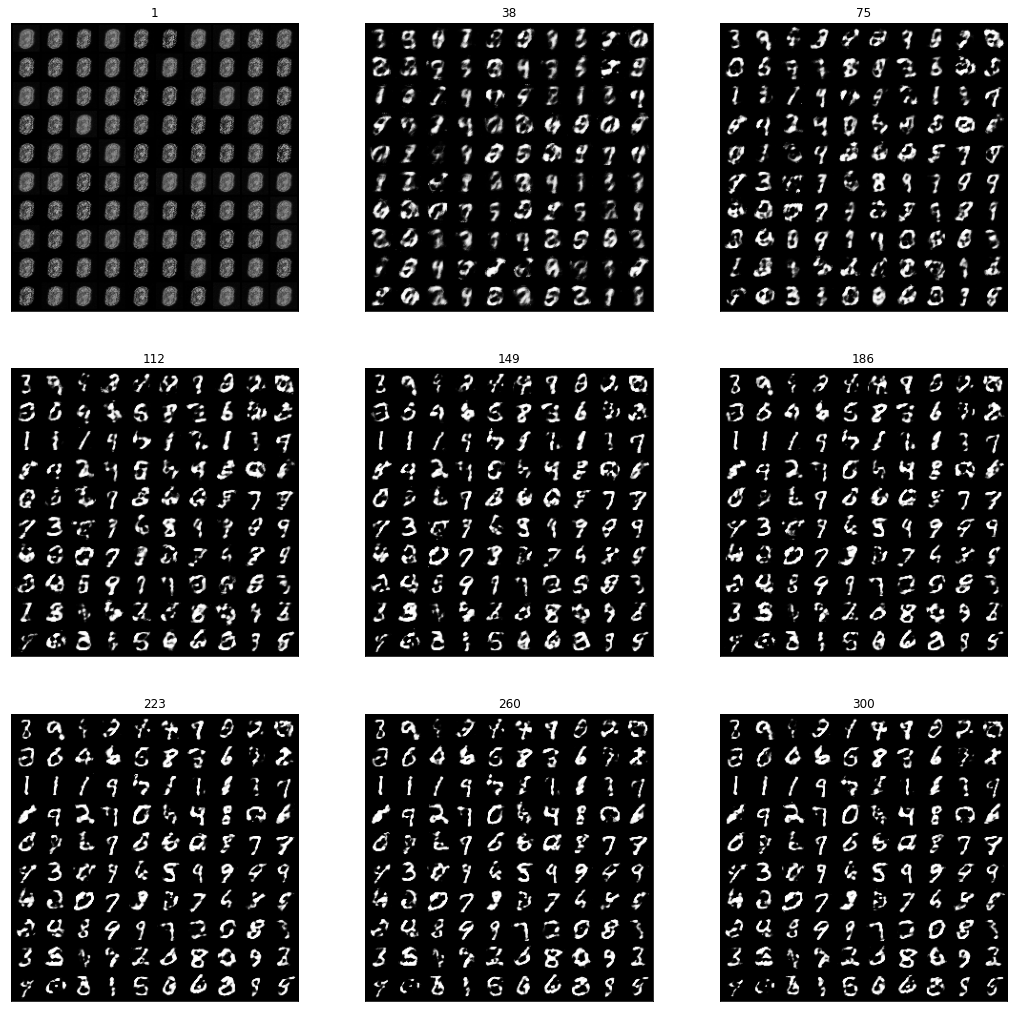

In [ ]:
import matplotlib.image as mpimg

# show output after epochs training
def read_img(sample_dir, num):
  return mpimg.imread(os.path.join(sample_dir, "fake_images-{0:0=4d}.png".format(num)))

def show_results(sample_dir, num_ehochs):
  images = []
  diff = num_ehochs // 8
  for i in range(1, num_ehochs - diff, diff):
    images.append((read_img(sample_dir, i), i))
  images.append((read_img(sample_dir, num_ehochs), num_ehochs))

  fig = plt.figure(figsize=(18, 18))
  i = 0
  for img, label in images:
    i += 1
    ax = fig.add_subplot(3, 3, i)
    ax.imshow(img)
    ax.set_title(label)
    ax.set_xticks([])
    ax.set_yticks([])

show_results("./images", 300)

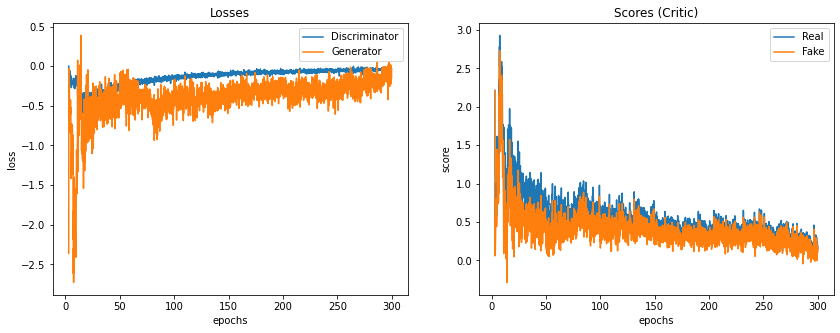

In [ ]:
# show the discrimator loss and generator loss
fig = plt.figure(figsize=(14, 5))
steps = [i / 10 for i in range(len(d_losses))]

ax = fig.add_subplot(1, 2, 1)
ax.plot(steps[30:], d_losses[30:], "-")
ax.plot(steps[30:], g_losses[30:], "-")
ax.set_xlabel("epochs")
ax.set_ylabel("loss")
ax.legend(["Discriminator", "Generator"])
ax.set_title("Losses")

ax = fig.add_subplot(1, 2, 2)
ax.plot(steps[30:], real_scores[30:], "-")
ax.plot(steps[30:], fake_scores[30:], "-")
ax.set_xlabel("epochs")
ax.set_ylabel("score")
ax.legend(["Real", "Fake"])
ax.set_title("Scores (Critic)");